<a href="https://colab.research.google.com/github/Sandeshkumar0/face_expression_detection/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [ ]:
from google.colab import files
import zipfile

uploaded = files.upload()


#unzip the above zip file
with zipfile.ZipFile("expression.zip",'r') as zip_ref:
  zip_ref.extractall('expression')

dataset = "expression"

Saving expression.zip to expression.zip


In [ ]:
data_dir = "expression"
IMG_SIZE = 48
images = []
labels = []
all_classes = set()

for split_folder in ["train", "test"]:
    split_path = os.path.join(data_dir, split_folder)
    if not os.path.isdir(split_path):
        continue

    for emotion_label in os.listdir(split_path):
        emotion_path = os.path.join(split_path, emotion_label)
        if not os.path.isdir(emotion_path):
            continue

        all_classes.add(emotion_label)
        print(f" Processing class: {emotion_label} in {split_folder}/")

        for img_file in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_file)

            # Skip non-image files
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                print(f" Skipped non-image file: {img_file}")
                continue

            # Try loading the image
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f" OpenCV couldn't read the file: {img_path}")
                    continue
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(emotion_label)
            except Exception as e:
                print(f" Exception for {img_path}: {e}")

print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")
print(f"Unique emotion classes found: {all_classes}")

classes = sorted(list(all_classes))
print(f"Classes in sorted order: {classes}")

label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)

images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype('float32') / 255.0
labels = to_categorical(integer_encoded_labels, num_classes=len(classes))

print("Images shape after preprocessing:", images.shape)
print("Labels shape after one-hot encoding:", labels.shape)

images_train, images_test, labels_train, labels_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training images: {images_train.shape}")
print(f"Testing images: {images_test.shape}")
print(f"Training labels: {labels_train.shape}")
print(f"Testing labels: {labels_test.shape}")

 Processing class: disgust in train/
 Processing class: angry in train/
 Processing class: sad in train/
 Processing class: happy in train/
 Processing class: surprise in train/
 Processing class: neutral in train/
 Processing class: fear in train/
 Processing class: disgust in test/
 Processing class: angry in test/
 Processing class: sad in test/
 Processing class: happy in test/
 Processing class: surprise in test/
 Processing class: neutral in test/
 Processing class: fear in test/
Total images loaded: 35887
Total labels loaded: 35887
Unique emotion classes found: {'angry', 'disgust', 'surprise', 'neutral', 'happy', 'fear', 'sad'}
Classes in sorted order: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Images shape after preprocessing: (35887, 48, 48, 1)
Labels shape after one-hot encoding: (35887, 7)
Training images: (28709, 48, 48, 1)
Testing images: (7178, 48, 48, 1)
Training labels: (28709, 7)
Testing labels: (7178, 7)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.path.join(data_dir, split_folder)

'expression/test'

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,911 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(images_train, labels_train, epochs=10,
                    validation_data=(images_test, labels_test))

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3021 - loss: 1.9996 - val_accuracy: 0.3692 - val_loss: 1.5801
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4247 - loss: 1.4838 - val_accuracy: 0.4522 - val_loss: 1.4064
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4671 - loss: 1.3714 - val_accuracy: 0.4617 - val_loss: 1.3988
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5004 - loss: 1.3015 - val_accuracy: 0.4748 - val_loss: 1.3849
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5284 - loss: 1.2296 - val_accuracy: 0.5194 - val_loss: 1.2551
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5540 - loss: 1.1552 - val_accuracy: 0.4982 - val_loss: 1.3107
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5848 - loss: 1.0865 - val_accuracy: 0.5233 - val_loss: 1.2797
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6093 - loss: 1.0317 - val_accuracy: 

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

 Classification Report:

              precision    recall  f1-score   support

       angry       0.52      0.36      0.43       991
     disgust       0.78      0.06      0.12       109
        fear       0.38      0.28      0.33      1024
       happy       0.72      0.79      0.75      1798
     neutral       0.47      0.61      0.53      1240
         sad       0.41      0.41      0.41      1216
    surprise       0.65      0.74      0.70       800

    accuracy                           0.55      7178
   macro avg       0.56      0.47      0.47      7178
weighted avg       0.54      0.55      0.54      7178



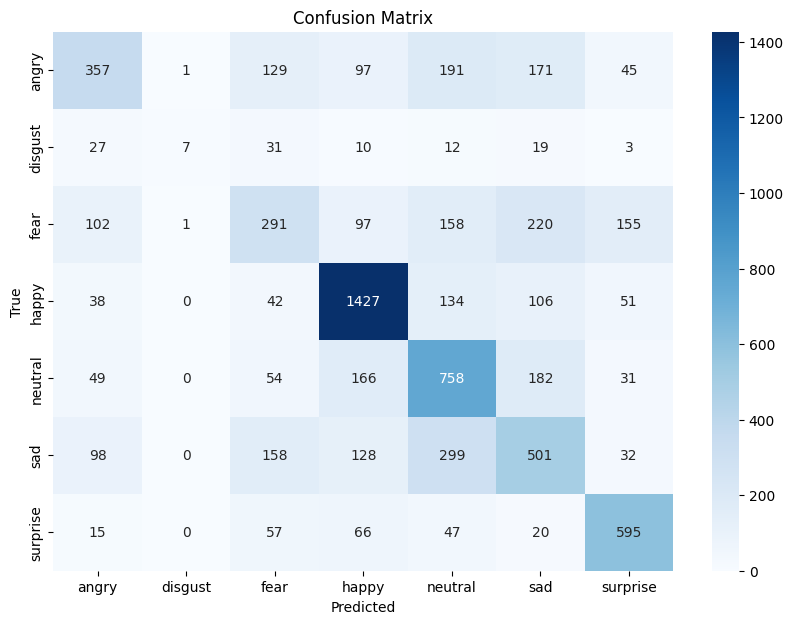

In [ ]:
y_pred = model.predict(images_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(labels_test, axis=1)

print("\n Classification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=classes))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("my_model.h5")


In [ ]:
from google.colab import files
files.download("my_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>